<a href="https://colab.research.google.com/github/DoctusHartwald/artaudCode/blob/master/DEVFEST_FIRST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile

local_zip = "./drive/My Drive/devfest_data.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')
zip_ref.close()

## local train test files

In [0]:
train_human_dir = './data/devfest_data/train/human'
train_hippo_dir = './data/devfest_data/train/hippopotamus'

test_human_dir = './data/devfest_data/test/human'
test_hippo_dir = './data/devfest_data/test/hippopotamus'

In [0]:
print("total human train :",len(os.listdir(train_human_dir)))
print("total hippo train :",len(os.listdir(train_hippo_dir)))
print("total human test :",len(os.listdir(test_human_dir)))
print("total hippo test :",len(os.listdir(test_hippo_dir)))

total human train : 200
total hippo train : 200
total human test : 50
total hippo test : 50


## DEEP LEARNING

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
img_input = layers.Input(shape=(150,150,3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(),
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    './data/devfest_data/train',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    './data/devfest_data/test',
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 20, # 400 = steps * batch
    epochs = 15,
    validation_data = test_generator,
    validation_steps = 5,
    verbose = 2
)

Epoch 1/15
Epoch 1/15
20/20 - 21s - loss: 0.7295 - acc: 0.6575 - val_loss: 0.5486 - val_acc: 0.6500
Epoch 2/15
Epoch 1/15
20/20 - 18s - loss: 0.4016 - acc: 0.8225 - val_loss: 0.2808 - val_acc: 0.9300
Epoch 3/15
Epoch 1/15
20/20 - 18s - loss: 0.3012 - acc: 0.8625 - val_loss: 0.2679 - val_acc: 0.9400
Epoch 4/15
Epoch 1/15
20/20 - 18s - loss: 0.1888 - acc: 0.9250 - val_loss: 0.2102 - val_acc: 0.9400
Epoch 5/15
Epoch 1/15
20/20 - 18s - loss: 0.1086 - acc: 0.9625 - val_loss: 0.2263 - val_acc: 0.9500
Epoch 6/15
Epoch 1/15
20/20 - 18s - loss: 0.0729 - acc: 0.9825 - val_loss: 0.2549 - val_acc: 0.9200
Epoch 7/15
Epoch 1/15
20/20 - 19s - loss: 0.0266 - acc: 0.9950 - val_loss: 0.1308 - val_acc: 0.9300
Epoch 8/15
Epoch 1/15
20/20 - 18s - loss: 0.1114 - acc: 0.9750 - val_loss: 0.3458 - val_acc: 0.8700
Epoch 9/15
Epoch 1/15
20/20 - 18s - loss: 0.1926 - acc: 0.9175 - val_loss: 0.2459 - val_acc: 0.9600
Epoch 10/15
Epoch 1/15
20/20 - 18s - loss: 0.0642 - acc: 0.9775 - val_loss: 0.4373 - val_acc: 0.8700

Text(0.5, 1.0, 'Training validation loss')

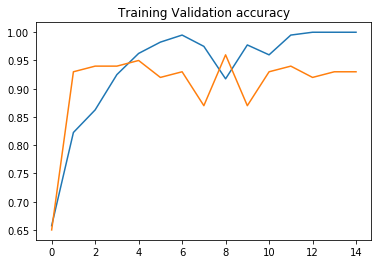

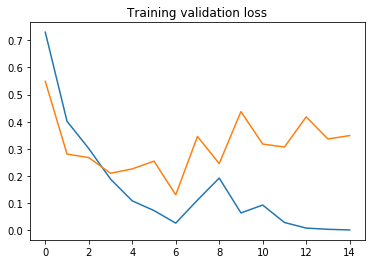

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
test_acc = history.history['val_acc']

loss = history.history['loss']
test_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, test_acc)
plt.title('Training Validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, test_loss)
plt.title('Training validation loss')

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img(test_human_dir + '/00000010.jpg', target_size =(150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

pred = model.predict(x)

classes = {0: 'Hippopotamus', 1:'Human'}

print(classes[np.rint(pred)[0][0]])

Human


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

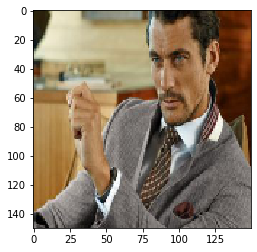

<Figure size 432x288 with 0 Axes>

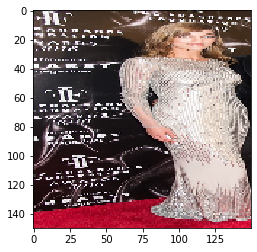

<Figure size 432x288 with 0 Axes>

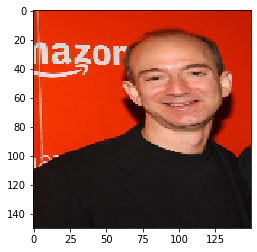

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

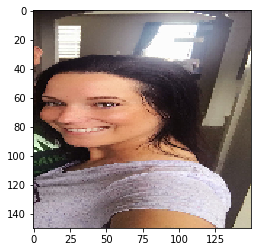

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

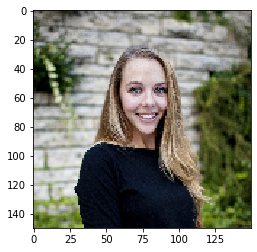

<Figure size 432x288 with 0 Axes>

In [0]:
next_human_pix = [os.path.join(test_human_dir, fname) for fname in os.listdir(test_human_dir)]
next_hippo_pix = [os.path.join(test_hippo_dir, fname) for fname in os.listdir(test_hippo_dir)]

for i in next_human_pix:
  plt.figure()
  img = load_img(i, target_size =(150,150))
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)

  x /= 255

  pred = model.predict(x)

  if(np.rint(pred)[0][0] == 0):
    plt.imshow(img)